In [1]:
import pandas as pd
import numpy as np
import scipy
import rtree
import fiona
from shapely.geometry import Point
import geopandas
import pysal
import matplotlib.pyplot as plt
import missingno as msn
import seaborn as sns

/Users/JTES/anaconda3/lib/python3.7/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [2]:
import geopandas as gpd
cars = gpd.read_file('Haiti_osm_results_cars.geojson')

In [3]:
def display_all(cars):
    with pd.option_context('display.max_rows', 1000):
        with pd.option_context('display.max_columns', 1000):
            display(cars)

In [4]:
display_all(cars.head())

,field_1,Unnamed: 0,algorithm,algorithm_instance,aoi_id,aoi_scene_area_coverage,aoi_scene_area_km2,aoi_scene_geometry,classes,imaging_ts,max_score,measured_count,measurement_id,off_nadir_angle_deg,provider,scene,scene_source,scores,area_km2,boundary_wkt,centroid_wkt,id,name,Date,cloud_cover,geometry
0,0,5288,CAR_DETECTOR,cars_dg_wide_area_v1.0.0,bebf6302-4786-4461-9437-017c1ee4ee46,0.149319,0.019857,None,None,2015-01-05T15:19:28,1,3,2747ed16-09e8-47a8-8bd8-4ff7642ea3e6,None,DIGITAL_GLOBE,10400100066D8700,WV03,None,0.132985,MULTIPOLYGON (((-72.2509852270607951 19.720873...,POINT (-72.22442753280046 19.7331069189983),bebf6302-4786-4461-9437-017c1ee4ee46,Cap_Haitienprimary,2015-01-05,0.00,"(POINT (-72.2457297914881 19.7226506132756), P..."
1,1,1683,CAR_DETECTOR,cars_dg_wide_area_v1.0.0,2299122c-05ae-45ff-ad9a-82cbeb100ea1,1.000000,0.149443,None,None,2015-01-15T16:21:20,1,50,77aef23f-552c-4704-8265-af860a4e49e4,None,DIGITAL_GLOBE,102001003941EE00,WV01,None,0.149443,MULTIPOLYGON (((-73.7474337542825964 18.215477...,POINT (-73.75694042776661 18.22631374204595),2299122c-05ae-45ff-ad9a-82cbeb100ea1,Les_Cayesprimary,2015-01-15,0.14,"(POINT (-73.7424289625224 18.2470598845599), P..."
2,2,5384,CAR_DETECTOR,cars_dg_wide_area_v1.0.0,010a59ba-c089-4f7f-ba0b-e0f17a9fefa9,1.000000,0.151695,None,None,2015-01-15T16:21:20,1,99,a38e266e-8e8c-4121-a9b6-d80f0363f481,None,DIGITAL_GLOBE,102001003941EE00,WV01,None,0.151696,MULTIPOLYGON (((-73.7935434618531048 18.181012...,POINT (-73.76574870423208 18.19599424396052),010a59ba-c089-4f7f-ba0b-e0f17a9fefa9,Les_Cayessecondary,2015-01-15,0.14,"(POINT (-73.7421005470666 18.1962076118326), P..."
3,3,3951,CAR_DETECTOR,cars_dg_wide_area_v1.0.0,b7218d9f-d98f-49de-b9d7-6f0053b97a2e,1.000000,0.148206,None,None,2015-01-15T16:21:20,1,65,5609d769-fff4-427c-9231-4a4da519d528,None,DIGITAL_GLOBE,102001003941EE00,WV01,None,0.148206,MULTIPOLYGON (((-73.7384643317882933 18.193036...,POINT (-73.75270090446548 18.19532474523495),b7218d9f-d98f-49de-b9d7-6f0053b97a2e,Les_Cayestertiary,2015-01-15,0.14,"(POINT (-73.74920298056971 18.1945887445887), ..."
4,4,2031,CAR_DETECTOR,cars_dg_wide_area_v1.0.0,eaf818c9-ea6e-45e5-9e1a-fa61fe48695b,1.000000,0.073726,None,None,2015-02-08T15:33:30,1,261,0c6a07d5-6a1c-489d-aef5-fe1c2a9a8f83,None,DIGITAL_GLOBE,10504100122BBA00,GE01,None,0.073726,MULTIPOLYGON (((-72.3126083812251039 18.580394...,POINT (-72.297554245383 18.58774420047284),eaf818c9-ea6e-45e5-9e1a-fa61fe48695b,Tabarre_Carrefour_Clercineprimary,2015-02-08,0.01,"(POINT (-72.28539007092201 18.5982097763348), ..."


In [5]:
cars.columns

Index(['field_1', 'Unnamed: 0', 'algorithm', 'algorithm_instance', 'aoi_id',
       'aoi_scene_area_coverage', 'aoi_scene_area_km2', 'aoi_scene_geometry',
       'classes', 'imaging_ts', 'max_score', 'measured_count',
       'measurement_id', 'off_nadir_angle_deg', 'provider', 'scene',
       'scene_source', 'scores', 'area_km2', 'boundary_wkt', 'centroid_wkt',
       'id', 'name', 'Date', 'cloud_cover', 'geometry'],
      dtype='object')

In [6]:
cars['measured_count'].sum()

630136

In [7]:
#Convert 'imaging_ts'to datetime format

cars['imaging_ts'] = pd.to_datetime(cars['imaging_ts'])
print(cars['imaging_ts'].dtype)

datetime64[ns]


In [8]:
cars['imaging_ts'].head()

0   2015-01-05 15:19:28
1   2015-01-15 16:21:20
2   2015-01-15 16:21:20
3   2015-01-15 16:21:20
4   2015-02-08 15:33:30
Name: imaging_ts, dtype: datetime64[ns]

In [9]:
#Converting numeric day to NAME
#Do this conversion first BEFORE setting datetime to index 
#Reference: https://stackoverflow.com/questions/30222533/create-a-day-of-week-column-in-a-pandas-dataframe-using-python

cars['Day_of_Week'] = cars['imaging_ts'].dt.day_name()
cars['Day_of_Week'].head()

0      Monday
1    Thursday
2    Thursday
3    Thursday
4      Sunday
Name: Day_of_Week, dtype: object

In [10]:
cars.set_index('imaging_ts', inplace=True)

In [11]:
cars["YEAR"] = cars.index.year
cars["MONTH"] = cars.index.month
cars["DAY"] = cars.index.day
cars["HOUR"] = cars.index.hour
cars["TIME"] = cars.index.time

In [12]:
display_all(cars.head())

,field_1,Unnamed: 0,algorithm,algorithm_instance,aoi_id,aoi_scene_area_coverage,aoi_scene_area_km2,aoi_scene_geometry,classes,max_score,measured_count,measurement_id,off_nadir_angle_deg,provider,scene,scene_source,scores,area_km2,boundary_wkt,centroid_wkt,id,name,Date,cloud_cover,geometry,Day_of_Week,YEAR,MONTH,DAY,HOUR,TIME
imaging_ts,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-05 15:19:28,0,5288,CAR_DETECTOR,cars_dg_wide_area_v1.0.0,bebf6302-4786-4461-9437-017c1ee4ee46,0.149319,0.019857,None,None,1,3,2747ed16-09e8-47a8-8bd8-4ff7642ea3e6,None,DIGITAL_GLOBE,10400100066D8700,WV03,None,0.132985,MULTIPOLYGON (((-72.2509852270607951 19.720873...,POINT (-72.22442753280046 19.7331069189983),bebf6302-4786-4461-9437-017c1ee4ee46,Cap_Haitienprimary,2015-01-05,0.00,"(POINT (-72.2457297914881 19.7226506132756), P...",Monday,2015,1,5,15,15:19:28
2015-01-15 16:21:20,1,1683,CAR_DETECTOR,cars_dg_wide_area_v1.0.0,2299122c-05ae-45ff-ad9a-82cbeb100ea1,1.000000,0.149443,None,None,1,50,77aef23f-552c-4704-8265-af860a4e49e4,None,DIGITAL_GLOBE,102001003941EE00,WV01,None,0.149443,MULTIPOLYGON (((-73.7474337542825964 18.215477...,POINT (-73.75694042776661 18.22631374204595),2299122c-05ae-45ff-ad9a-82cbeb100ea1,Les_Cayesprimary,2015-01-15,0.14,"(POINT (-73.7424289625224 18.2470598845599), P...",Thursday,2015,1,15,16,16:21:20
2015-01-15 16:21:20,2,5384,CAR_DETECTOR,cars_dg_wide_area_v1.0.0,010a59ba-c089-4f7f-ba0b-e0f17a9fefa9,1.000000,0.151695,None,None,1,99,a38e266e-8e8c-4121-a9b6-d80f0363f481,None,DIGITAL_GLOBE,102001003941EE00,WV01,None,0.151696,MULTIPOLYGON (((-73.7935434618531048 18.181012...,POINT (-73.76574870423208 18.19599424396052),010a59ba-c089-4f7f-ba0b-e0f17a9fefa9,Les_Cayessecondary,2015-01-15,0.14,"(POINT (-73.7421005470666 18.1962076118326), P...",Thursday,2015,1,15,16,16:21:20
2015-01-15 16:21:20,3,3951,CAR_DETECTOR,cars_dg_wide_area_v1.0.0,b7218d9f-d98f-49de-b9d7-6f0053b97a2e,1.000000,0.148206,None,None,1,65,5609d769-fff4-427c-9231-4a4da519d528,None,DIGITAL_GLOBE,102001003941EE00,WV01,None,0.148206,MULTIPOLYGON (((-73.7384643317882933 18.193036...,POINT (-73.75270090446548 18.19532474523495),b7218d9f-d98f-49de-b9d7-6f0053b97a2e,Les_Cayestertiary,2015-01-15,0.14,"(POINT (-73.74920298056971 18.1945887445887), ...",Thursday,2015,1,15,16,16:21:20
2015-02-08 15:33:30,4,2031,CAR_DETECTOR,cars_dg_wide_area_v1.0.0,eaf818c9-ea6e-45e5-9e1a-fa61fe48695b,1.000000,0.073726,None,None,1,261,0c6a07d5-6a1c-489d-aef5-fe1c2a9a8f83,None,DIGITAL_GLOBE,10504100122BBA00,GE01,None,0.073726,MULTIPOLYGON (((-72.3126083812251039 18.580394...,POINT (-72.297554245383 18.58774420047284),eaf818c9-ea6e-45e5-9e1a-fa61fe48695b,Tabarre_Carrefour_Clercineprimary,2015-02-08,0.01,"(POINT (-72.28539007092201 18.5982097763348), ...",Sunday,2015,2,8,15,15:33:30


In [13]:
#use regular expressions to clean up string data 
import re

In [14]:
#Part 1: Cleaning the 'name' column which puts together the city + type of road - primary/secondary/tertiary
#Created separate columns for type of road

cars["Primary_Road"] = cars["name"].map(lambda x: 1 if 'primary' in str(x).lower() else 0)
cars["Secondary_Road"] = cars["name"].map(lambda x: 1 if 'secondary' in str(x).lower() else 0)
cars["Tertiary_Road"] = cars["name"].map(lambda x: 1 if 'tertiary' in str(x).lower() else 0)

In [15]:
#Part 2: Separating city in 'name' column

cars["Area_Primary"] = cars["name"].str.extract("(^.+?(?=primary))", expand=True)
cars["Area_Secondary"] = cars["name"].str.extract("(^.+?(?=secondary))", expand=True)
cars["Area_Tertiary"] = cars["name"].str.extract("(^.+?(?=tertiary))", expand=True)

In [16]:
cars.head()

,field_1,Unnamed: 0,algorithm,algorithm_instance,aoi_id,aoi_scene_area_coverage,aoi_scene_area_km2,aoi_scene_geometry,classes,max_score,...,MONTH,DAY,HOUR,TIME,Primary_Road,Secondary_Road,Tertiary_Road,Area_Primary,Area_Secondary,Area_Tertiary
imaging_ts,,,,,,,,,,,,,,,,,,,,,
2015-01-05 15:19:28,0,5288,CAR_DETECTOR,cars_dg_wide_area_v1.0.0,bebf6302-4786-4461-9437-017c1ee4ee46,0.149319,0.019857,None,None,1,...,1,5,15,15:19:28,1,0,0,Cap_Haitien,NaN,NaN
2015-01-15 16:21:20,1,1683,CAR_DETECTOR,cars_dg_wide_area_v1.0.0,2299122c-05ae-45ff-ad9a-82cbeb100ea1,1.000000,0.149443,None,None,1,...,1,15,16,16:21:20,1,0,0,Les_Cayes,NaN,NaN
2015-01-15 16:21:20,2,5384,CAR_DETECTOR,cars_dg_wide_area_v1.0.0,010a59ba-c089-4f7f-ba0b-e0f17a9fefa9,1.000000,0.151695,None,None,1,...,1,15,16,16:21:20,0,1,0,NaN,Les_Cayes,NaN
2015-01-15 16:21:20,3,3951,CAR_DETECTOR,cars_dg_wide_area_v1.0.0,b7218d9f-d98f-49de-b9d7-6f0053b97a2e,1.000000,0.148206,None,None,1,...,1,15,16,16:21:20,0,0,1,NaN,NaN,Les_Cayes
2015-02-08 15:33:30,4,2031,CAR_DETECTOR,cars_dg_wide_area_v1.0.0,eaf818c9-ea6e-45e5-9e1a-fa61fe48695b,1.000000,0.073726,None,None,1,...,2,8,15,15:33:30,1,0,0,Tabarre_Carrefour_Clercine,NaN,NaN


In [17]:
#Part 3: Combining extracted city name from 'name' column into 1 column, 'AREA'
cars["AREA"] = cars["Area_Secondary"].map(str) + cars["Area_Primary"].map(str) + cars["Area_Tertiary"].map(str) 


In [18]:
#Part 4: Removing 'nan' from 'AREA' column

cars["AREA"] = cars["AREA"].str.strip('nan')

In [19]:
cars.head()

,field_1,Unnamed: 0,algorithm,algorithm_instance,aoi_id,aoi_scene_area_coverage,aoi_scene_area_km2,aoi_scene_geometry,classes,max_score,...,DAY,HOUR,TIME,Primary_Road,Secondary_Road,Tertiary_Road,Area_Primary,Area_Secondary,Area_Tertiary,AREA
imaging_ts,,,,,,,,,,,,,,,,,,,,,
2015-01-05 15:19:28,0,5288,CAR_DETECTOR,cars_dg_wide_area_v1.0.0,bebf6302-4786-4461-9437-017c1ee4ee46,0.149319,0.019857,None,None,1,...,5,15,15:19:28,1,0,0,Cap_Haitien,NaN,NaN,Cap_Haitie
2015-01-15 16:21:20,1,1683,CAR_DETECTOR,cars_dg_wide_area_v1.0.0,2299122c-05ae-45ff-ad9a-82cbeb100ea1,1.000000,0.149443,None,None,1,...,15,16,16:21:20,1,0,0,Les_Cayes,NaN,NaN,Les_Cayes
2015-01-15 16:21:20,2,5384,CAR_DETECTOR,cars_dg_wide_area_v1.0.0,010a59ba-c089-4f7f-ba0b-e0f17a9fefa9,1.000000,0.151695,None,None,1,...,15,16,16:21:20,0,1,0,NaN,Les_Cayes,NaN,Les_Cayes
2015-01-15 16:21:20,3,3951,CAR_DETECTOR,cars_dg_wide_area_v1.0.0,b7218d9f-d98f-49de-b9d7-6f0053b97a2e,1.000000,0.148206,None,None,1,...,15,16,16:21:20,0,0,1,NaN,NaN,Les_Cayes,Les_Cayes
2015-02-08 15:33:30,4,2031,CAR_DETECTOR,cars_dg_wide_area_v1.0.0,eaf818c9-ea6e-45e5-9e1a-fa61fe48695b,1.000000,0.073726,None,None,1,...,8,15,15:33:30,1,0,0,Tabarre_Carrefour_Clercine,NaN,NaN,Tabarre_Carrefour_Clercine


In [20]:
#Created new dataframe with only the columns that I need 

cars1 = cars[['YEAR','MONTH','Day_of_Week','HOUR','TIME','AREA','Primary_Road','Secondary_Road','Tertiary_Road','measured_count','cloud_cover','geometry','boundary_wkt','centroid_wkt']].copy()


In [21]:
cars1.head()

,YEAR,MONTH,Day_of_Week,HOUR,TIME,AREA,Primary_Road,Secondary_Road,Tertiary_Road,measured_count,cloud_cover,geometry,boundary_wkt,centroid_wkt
imaging_ts,,,,,,,,,,,,,,
2015-01-05 15:19:28,2015,1,Monday,15,15:19:28,Cap_Haitie,1,0,0,3,0.00,"(POINT (-72.2457297914881 19.7226506132756), P...",MULTIPOLYGON (((-72.2509852270607951 19.720873...,POINT (-72.22442753280046 19.7331069189983)
2015-01-15 16:21:20,2015,1,Thursday,16,16:21:20,Les_Cayes,1,0,0,50,0.14,"(POINT (-73.7424289625224 18.2470598845599), P...",MULTIPOLYGON (((-73.7474337542825964 18.215477...,POINT (-73.75694042776661 18.22631374204595)
2015-01-15 16:21:20,2015,1,Thursday,16,16:21:20,Les_Cayes,0,1,0,99,0.14,"(POINT (-73.7421005470666 18.1962076118326), P...",MULTIPOLYGON (((-73.7935434618531048 18.181012...,POINT (-73.76574870423208 18.19599424396052)
2015-01-15 16:21:20,2015,1,Thursday,16,16:21:20,Les_Cayes,0,0,1,65,0.14,"(POINT (-73.74920298056971 18.1945887445887), ...",MULTIPOLYGON (((-73.7384643317882933 18.193036...,POINT (-73.75270090446548 18.19532474523495)
2015-02-08 15:33:30,2015,2,Sunday,15,15:33:30,Tabarre_Carrefour_Clercine,1,0,0,261,0.01,"(POINT (-72.28539007092201 18.5982097763348), ...",MULTIPOLYGON (((-72.3126083812251039 18.580394...,POINT (-72.297554245383 18.58774420047284)


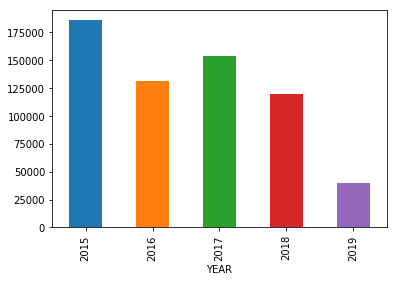

In [22]:
#'measured_count' refers to count of vehicles 
dfchart_year = cars1.groupby(["YEAR"])["measured_count"].sum()

dfchart_year.plot.bar()

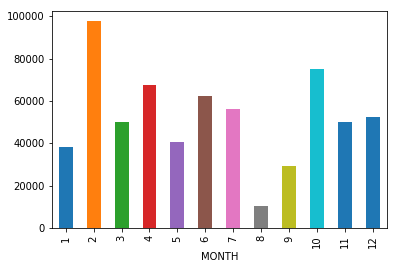

In [23]:
dfchart_month = cars1.groupby(["MONTH"])["measured_count"].sum()

dfchart_month.plot.bar()

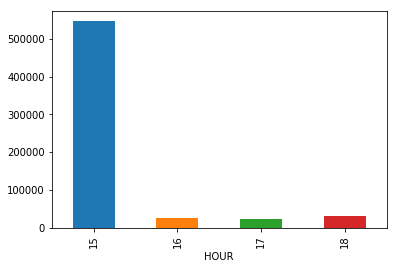

In [24]:
dfchart_hour = cars1.groupby(["HOUR"])["measured_count"].sum()

dfchart_hour.plot.bar()

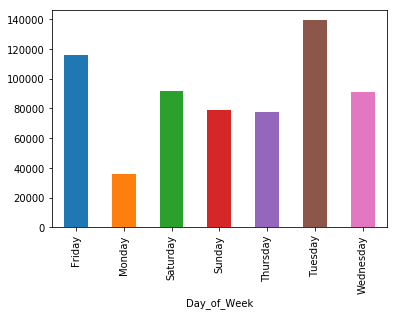

In [25]:
dfchart_day = cars1.groupby(["Day_of_Week"])["measured_count"].sum()

dfchart_day.plot.bar()

/Users/JTES/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


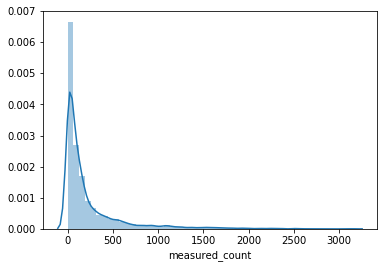

In [26]:
sns.distplot(cars1['measured_count'])

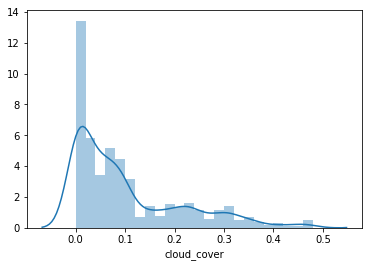

In [27]:
sns.distplot(cars1['cloud_cover'])

In [29]:
total_cars_Haiti = cars1.groupby(["AREA"])["Primary_Road","Secondary_Road","Tertiary_Road"].sum()

In [30]:
all_cars_Haiti = []
for city in range(total_cars_Haiti.shape[0]):
    count = sum(total_cars_Haiti.iloc[city,:])
    all_cars_Haiti.append(count)
    


total_cars_Haiti["Total"] = all_cars_Haiti

In [31]:
total_cars_Haiti.sort_values("Total", ascending=False)

,Primary_Road,Secondary_Road,Tertiary_Road,Total
AREA,,,,
Croix_de_Bouquets_Seguy,74,72,72,218
Croix_de_Bouquets_Morpeau,70,69,64,203
Tabarre_Carrefour_Clercine,66,61,65,192
Delmas,55,65,66,186
Port_au_Prince,57,61,66,184
Croix_des_Bouquets_Noailles,58,57,65,180
Les_Cayes,59,50,48,157
Ouanaminthe,57,45,47,149
Cite_Soleil,0,69,66,135


In [32]:
cars1.groupby(["YEAR"])["measured_count","Primary_Road","Secondary_Road","Tertiary_Road"].sum()

,measured_count,Primary_Road,Secondary_Road,Tertiary_Road
YEAR,,,,
2015,185618,181,233,259
2016,131044,171,199,227
2017,154049,202,257,295
2018,119530,148,163,197
2019,39895,54,61,71


In [33]:
cars1.groupby(["HOUR"])["measured_count","Primary_Road","Secondary_Road","Tertiary_Road"].sum()

,measured_count,Primary_Road,Secondary_Road,Tertiary_Road
HOUR,,,,
15,546718,636,784,892
16,26600,26,28,32
17,25124,46,48,59
18,31694,48,53,66


In [34]:
#From this new dataframe, I am creating 'city' level dataframes: one for Cap-Haitien and one for Port-au-Prince

In [35]:
#Creating dataframe for Cap Haitien (CAP)

cars_CAP = cars1[cars1['AREA'].isin(['Cap_Haitie','Cap_Haitien_Cormier','Cap_Haitien_Fort_Saint_Michel','Quartier_Mori'])]
cars_CAP.head()

,YEAR,MONTH,Day_of_Week,HOUR,TIME,AREA,Primary_Road,Secondary_Road,Tertiary_Road,measured_count,cloud_cover,geometry,boundary_wkt,centroid_wkt
imaging_ts,,,,,,,,,,,,,,
2015-01-05 15:19:28,2015,1,Monday,15,15:19:28,Cap_Haitie,1,0,0,3,0.0,"(POINT (-72.2457297914881 19.7226506132756), P...",MULTIPOLYGON (((-72.2509852270607951 19.720873...,POINT (-72.22442753280046 19.7331069189983)
2015-02-08 15:34:03,2015,2,Sunday,15,15:34:03,Cap_Haitie,0,0,1,82,0.1,"(POINT (-72.19425385934819 19.7692325036075), ...",MULTIPOLYGON (((-72.2009676388108943 19.757069...,POINT (-72.20590779485249 19.75709862267777)
2015-02-08 15:34:03,2015,2,Sunday,15,15:34:03,Cap_Haitien_Fort_Saint_Michel,0,0,1,8,0.1,"(POINT (-72.2016437964551 19.7539502164502), P...",MULTIPOLYGON (((-72.1940110977154035 19.737545...,POINT (-72.19694811903381 19.7448544373434)
2015-02-08 15:34:03,2015,2,Sunday,15,15:34:03,Quartier_Mori,0,1,0,3,0.1,"(POINT (-72.1917023707512 19.7198547979798), P...",MULTIPOLYGON (((-72.2067170196955033 19.716313...,POINT (-72.19387932714406 19.7189162816153)
2015-02-08 15:34:03,2015,2,Sunday,15,15:34:03,Cap_Haitien_Cormier,0,0,1,14,0.1,"(POINT (-72.2102391842958 19.7731376262626), P...",MULTIPOLYGON (((-72.2424468118491063 19.782620...,POINT (-72.22192887563028 19.78010165106515)


In [36]:
len(cars_CAP)

305

In [37]:
cars_CAP['measured_count'].sum()

25070

In [38]:
(cars_CAP['measured_count'].sum() / cars['measured_count'].sum()) * 100

3.9785062272271383

In [39]:
from shapely import wkt

cars_CAP['boundary_wkt'] = cars_CAP['boundary_wkt'].apply(wkt.loads)

/Users/JTES/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
cars_CAP['centroid_wkt'] = cars_CAP['centroid_wkt'].apply(wkt.loads)

/Users/JTES/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


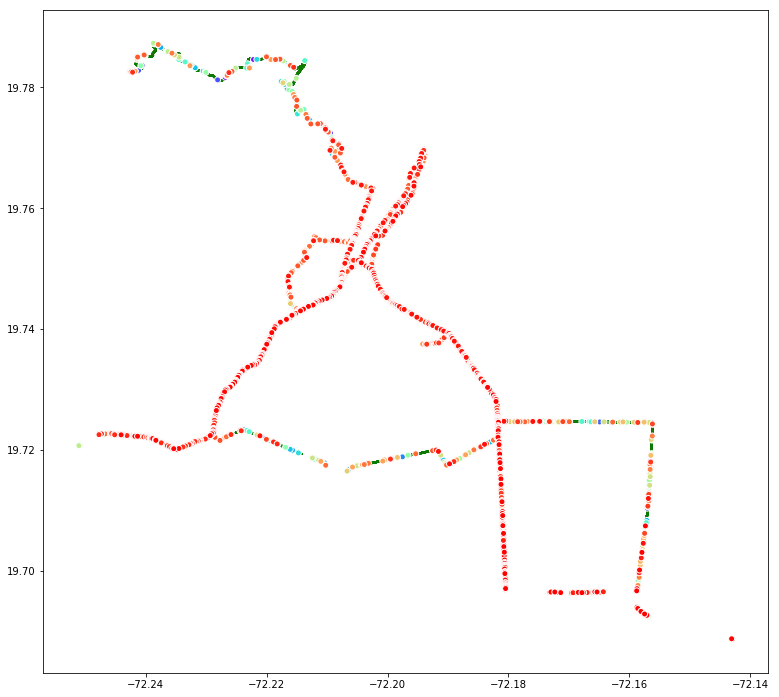

In [41]:
fig,ax = plt.subplots(1,1,figsize=(13,13))


cars_CAP.set_geometry('boundary_wkt').plot(edgecolor = 'green',color='red', ax = ax)
#world[world.name=='Haiti'].plot(edgecolor = 'black',color='white', ax = ax)
cars_CAP.plot(cmap = 'rainbow',edgecolor = 'white',ax = ax)
plt.show()

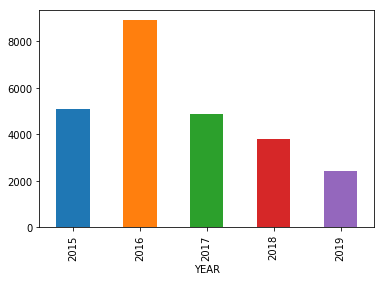

In [42]:
dfchartCAP_year = cars_CAP.groupby(["YEAR"])["measured_count"].sum()

dfchartCAP_year.plot.bar()

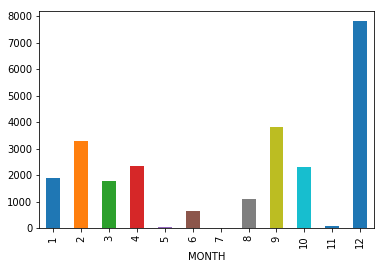

In [43]:
dfchartCAP_month = cars_CAP.groupby(["MONTH"])["measured_count"].sum()

dfchartCAP_month.plot.bar()

In [44]:
cars_CAP.groupby(["YEAR"])["measured_count","Primary_Road","Secondary_Road","Tertiary_Road"].sum()

,measured_count,Primary_Road,Secondary_Road,Tertiary_Road
YEAR,,,,
2015,5087,22,20,27
2016,8899,36,28,42
2017,4861,18,13,22
2018,3819,14,10,18
2019,2404,12,9,14


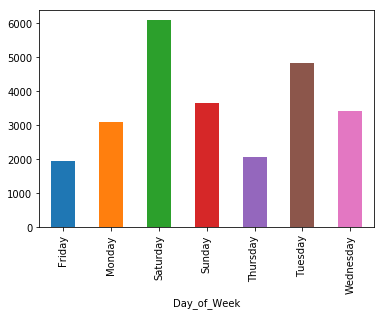

In [45]:
dfchartCAP_day= cars_CAP.groupby(["Day_of_Week"])["measured_count"].sum()

dfchartCAP_day.plot.bar()

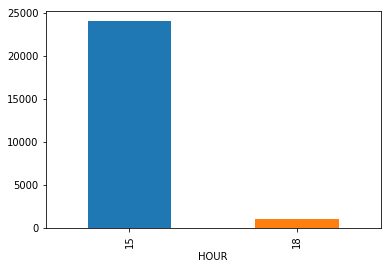

In [46]:
dfchartCAP_hour= cars_CAP.groupby(["HOUR"])["measured_count"].sum()

dfchartCAP_hour.plot.bar()

In [47]:
#Creating dataframe for Port-au-Prince (PAP)

cars_PAP = cars1[cars1['AREA'].isin(['Carrefour_Clocher','Carrefour_Fontamar', 'Carrefour_Thor_Le_Volant','Cite_Soleil','Cite_Soleil_Blanchard','Croix_de_Bouquets_Seguy', 'Croix_de_Bouquets_Morpeau','Croix_des_Bouquets_Noailles','Delmas','Petion_Ville','Petion_Ville_Boutilliers','Port_au_Prince','Port_au_Prince_Sevane_Salee','Port_au_Prince_Campeche','Tabarre','Tabarre_Carrefour_Clercine'])]
cars_PAP.head()

,YEAR,MONTH,Day_of_Week,HOUR,TIME,AREA,Primary_Road,Secondary_Road,Tertiary_Road,measured_count,cloud_cover,geometry,boundary_wkt,centroid_wkt
imaging_ts,,,,,,,,,,,,,,
2015-02-08 15:33:30,2015,2,Sunday,15,15:33:30,Tabarre_Carrefour_Clercine,1,0,0,261,0.01,"(POINT (-72.28539007092201 18.5982097763348), ...",MULTIPOLYGON (((-72.3126083812251039 18.580394...,POINT (-72.297554245383 18.58774420047284)
2015-02-08 15:33:30,2015,2,Sunday,15,15:33:30,Croix_de_Bouquets_Seguy,0,1,0,93,0.01,"(POINT (-72.2211300236407 18.6045544733045), P...",MULTIPOLYGON (((-72.2686078113494972 18.625715...,POINT (-72.2530977832503 18.62667434989489)
2015-02-08 15:33:30,2015,2,Sunday,15,15:33:30,Croix_de_Bouquets_Morpeau,1,0,0,207,0.01,"(POINT (-72.27037667991669 18.6401154401154), ...",MULTIPOLYGON (((-72.2855147256389046 18.598354...,POINT (-72.27765713736908 18.63327343124534)
2015-02-08 15:33:30,2015,2,Sunday,15,15:33:30,Cite_Soleil_Blanchard,0,0,1,10,0.01,"(POINT (-72.3055224586288 18.5982774170274), P...",MULTIPOLYGON (((-72.3204684694733970 18.602494...,POINT (-72.30693016149135 18.5957292839847)
2015-02-08 15:33:30,2015,2,Sunday,15,15:33:30,Port_au_Prince,0,0,1,444,0.01,"(POINT (-72.2957163120567 18.5375901875902), P...",MULTIPOLYGON (((-72.2967681564985014 18.536661...,POINT (-72.33094565920013 18.54091507721158)


In [48]:
cars_PAP['AREA'].value_counts()

Croix_de_Bouquets_Seguy        218
Croix_de_Bouquets_Morpeau      203
Tabarre_Carrefour_Clercine     192
Delmas                         186
Port_au_Prince                 184
Croix_des_Bouquets_Noailles    180
Cite_Soleil                    135
Petion_Ville                   129
Tabarre                        117
Petion_Ville_Boutilliers       109
Port_au_Prince_Sevane_Salee    100
Carrefour_Thor_Le_Volant        97
Carrefour_Clocher               74
Cite_Soleil_Blanchard           63
Carrefour_Fontamar              37
Port_au_Prince_Campeche         14
Name: AREA, dtype: int64

In [49]:
#Total count of cars in Port-Au-Prince area
cars_PAP['measured_count'].sum()

583617

In [50]:
(cars_PAP['measured_count'].sum() / cars['measured_count'].sum()) * 100

92.61762540150062

In [51]:
cars_PAP['boundary_wkt'] = cars_PAP['boundary_wkt'].apply(wkt.loads)

/Users/JTES/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
cars_PAP['centroid_wkt'] = cars_PAP['centroid_wkt'].apply(wkt.loads)

/Users/JTES/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


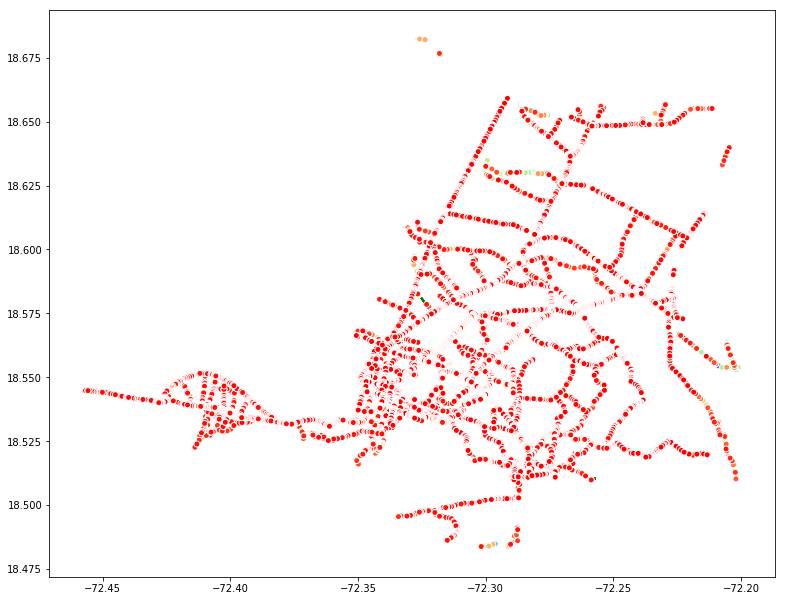

In [53]:
fig,ax = plt.subplots(1,1,figsize=(13,13))


cars_PAP.set_geometry('boundary_wkt').plot(edgecolor = 'green',color='red', ax = ax)
#world[world.name=='Haiti'].plot(edgecolor = 'black',color='white', ax = ax)
cars_PAP.plot(cmap = 'rainbow',edgecolor = 'white',ax = ax)
plt.show()

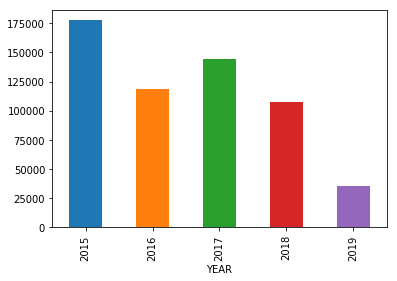

In [54]:
dfchartPAP_year = cars_PAP.groupby(["YEAR"])["measured_count"].sum()

dfchartPAP_year.plot.bar()

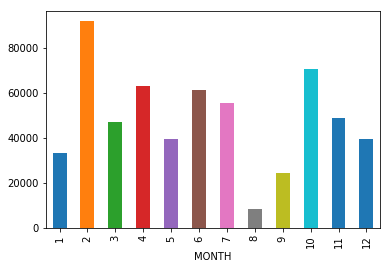

In [55]:
dfchartPAP_month = cars_PAP.groupby(["MONTH"])["measured_count"].sum()

dfchartPAP_month.plot.bar()

In [56]:
total_PAP = cars_PAP.groupby(["AREA"])["Primary_Road","Secondary_Road","Tertiary_Road"].sum()

In [57]:
all_cars = []
for city in range(total_PAP.shape[0]):
    count = sum(total_PAP.iloc[city,:])
    all_cars.append(count)
    


total_PAP["Total"] = all_cars

In [58]:
total_PAP.sort_values("Total", ascending=False)

,Primary_Road,Secondary_Road,Tertiary_Road,Total
AREA,,,,
Croix_de_Bouquets_Seguy,74,72,72,218
Croix_de_Bouquets_Morpeau,70,69,64,203
Tabarre_Carrefour_Clercine,66,61,65,192
Delmas,55,65,66,186
Port_au_Prince,57,61,66,184
Croix_des_Bouquets_Noailles,58,57,65,180
Cite_Soleil,0,69,66,135
Petion_Ville,0,63,66,129
Tabarre,0,57,60,117


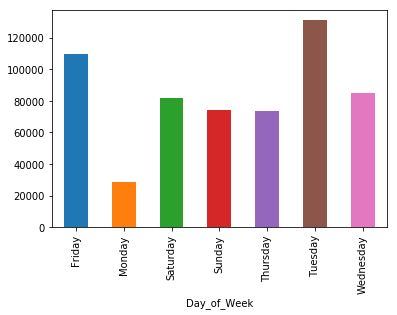

In [59]:
dfchartPAP_day= cars_PAP.groupby(["Day_of_Week"])["measured_count"].sum()

dfchartPAP_day.plot.bar()

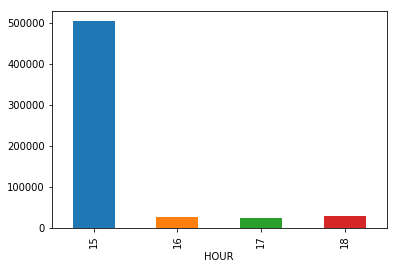

In [60]:
dfchartPAP_hour= cars_PAP.groupby(["HOUR"])["measured_count"].sum()

dfchartPAP_hour.plot.bar()

In [62]:
#transform to CSV 
cars_PAP.to_csv(r'Desktop\cars_PAP_0719.csv')

In [63]:
#transform to CSV 
cars_CAP.to_csv(r'Desktop\cars_CAP_0719.csv')